In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
exp_name = "exp_compass"
exp_number = "test_2"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/discrete_new/{exp_name}/{exp_number}"

In [5]:
results_path2 = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_compas_boostrap_continuous_seq/paper_loss_reproduce/l_0.0"

In [6]:
results_path

'/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/discrete_new/exp_compass/test_2'

In [7]:
results_path2

'/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_compas_boostrap_continuous_seq/paper_loss_reproduce/l_0.0'

# Plots

In [8]:
metric_symbol = {"Balance": "B",
                 "Utility": "U",
                 "Fairness": "F"}
runs = range(10)

In [12]:
l_exp = "l_0.2"
bootstrap_results = pd.read_csv(results_path + f"/{l_exp}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
marginal_results = pd.read_csv(results_path + f"/{l_exp}/marginal_results_all.csv",header=[0, 1],index_col=[0])
baysian_results = pd.read_csv(results_path + f"/{l_exp}/bayes_results_all.csv",header=[0, 1],index_col=[0])

In [13]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [14]:
boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results, metric_name = "eval_loss", runs=runs)
marginal_loss = get_metrics_from_multi_columns(data=marginal_results, metric_name = "eval_loss", runs=runs)
bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
all_results = {
    "bootstrap_mean":bootstrap_mean,
    "bootstrap_std":bootstrap_std,
    "marginal_mean":marginal_mean,
    "marginal_std":marginal_std,
    
}
all_results = pd.DataFrame(all_results)

In [15]:
def plot_metric(all_results,metric, l ):
    plt.figure()
    plt.plot(range(all_results.shape[0]), all_results["bootstrap_mean"],"--")
    plt.fill_between(x = range(all_results.shape[0]),
                     y1 = (all_results["bootstrap_mean"]-all_results["bootstrap_std"]).values,
                     y2 = (all_results["bootstrap_mean"]+all_results["bootstrap_std"]).values,
                     alpha = 0.2)

    plt.plot(range(all_results.shape[0]), all_results["marginal_mean"],"--")
    plt.fill_between(x = range(all_results.shape[0]),
                     y1 = (all_results["marginal_mean"]-all_results["marginal_std"]).values,
                     y2 = (all_results["marginal_mean"]+all_results["marginal_std"]).values,
                     alpha = 0.2)
    plt.xlabel("t")
    plt.ylabel(metric_symbol[metric])
    plt.title(f"{metric}, λ= {l}")
    plt.show()
    plt.close()


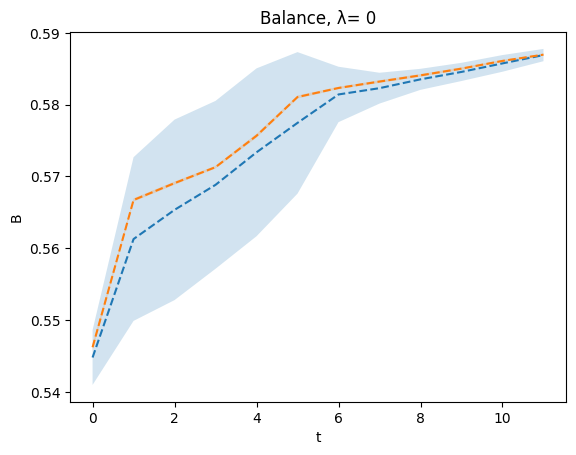

In [16]:
plot_metric(all_results = all_results, metric="Balance",  l= 0)

In [18]:
bayesian_loss = get_metrics_from_multi_columns(data=baysian_results,
                                               metric_name = "eval_fairness_loss",
                                               runs=runs)

In [19]:
bayesian_loss

,eval_fairness_loss_0,eval_fairness_loss_1,eval_fairness_loss_2,eval_fairness_loss_3,eval_fairness_loss_4,eval_fairness_loss_5,eval_fairness_loss_6,eval_fairness_loss_7,eval_fairness_loss_8,eval_fairness_loss_9
0,0.003803,0.014880,0.024584,0.146466,0.047795,0.055263,0.072694,0.002406,0.017648,0.067487
1,0.002618,0.024966,0.096726,0.187409,0.091496,0.138829,0.161745,0.001734,0.032535,0.117876
2,0.001686,0.054553,0.105097,0.188545,0.145737,0.165737,0.170348,0.001235,0.111941,0.176266
3,0.001246,0.107764,0.148174,0.186934,0.172370,0.138105,0.189848,0.000871,0.119564,0.177335
4,0.001066,0.139802,0.173837,0.206443,0.184594,0.170300,0.195497,0.000716,0.188656,0.196638
5,0.001017,0.192307,0.199523,0.209228,0.201235,0.196964,0.203129,0.000653,0.203599,0.206282
6,0.001091,0.203391,0.205407,0.213167,0.203816,0.203160,0.209345,0.000640,0.207944,0.211058
7,0.001276,0.205883,0.208259,0.212172,0.207631,0.206611,0.211283,0.000660,0.207757,0.210350
8,0.001476,0.208300,0.212282,0.215933,0.209985,0.209536,0.211816,0.000697,0.211630,0.212341
9,0.001744,0.212126,0.212184,0.216166,0.210727,0.211726,0.211889,0.000722,0.211833,0.214933


<AxesSubplot: >

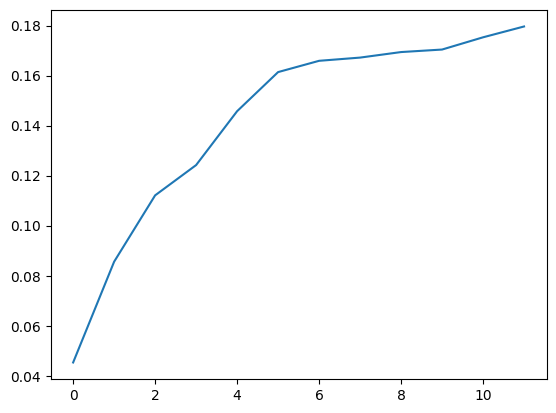

In [20]:
bayesian_loss.mean(axis=1).plot()

In [46]:
bayesian_loss.std(axis=1)

0     0.000121
1     0.000071
2     0.000115
3     0.000266
4     0.000414
5     0.000522
6     0.000323
7     0.000402
8     0.000470
9     0.000538
10    0.000557
11    0.000813
dtype: float64

In [48]:
bayesian_loss

,eval_fairness_loss_0,eval_fairness_loss_1,eval_fairness_loss_2,eval_fairness_loss_3,eval_fairness_loss_4,eval_fairness_loss_5,eval_fairness_loss_6,eval_fairness_loss_7,eval_fairness_loss_8,eval_fairness_loss_9
0,0.000050,4.737038e-05,7.797884e-05,0.000328,0.000335,2.473759e-05,4.932547e-05,0.000189,6.116321e-05,3.409273e-05
1,0.000146,1.612767e-05,2.151798e-05,0.000222,0.000079,1.259646e-05,2.038117e-05,0.000110,2.846585e-05,1.912069e-05
2,0.000234,9.679289e-06,7.534377e-06,0.000130,0.000137,1.233821e-05,8.518034e-06,0.000323,1.168488e-05,4.778603e-06
3,0.000359,3.553691e-06,5.345908e-06,0.000551,0.000526,3.365841e-06,6.025592e-06,0.000593,4.072694e-06,6.538127e-06
4,0.000850,2.604272e-06,5.267810e-06,0.000522,0.001115,3.915716e-06,5.351700e-06,0.000267,1.951651e-06,2.676169e-06
5,0.001271,2.295554e-06,2.330825e-06,0.000642,0.001228,5.284366e-06,2.506854e-06,0.000190,2.211175e-06,4.692943e-06
6,0.000540,1.250973e-06,2.182668e-06,0.000435,0.000643,2.059852e-06,3.006658e-06,0.000797,1.509824e-06,2.466427e-06
7,0.000864,8.389352e-07,1.629784e-06,0.000428,0.000818,1.439667e-06,1.851857e-06,0.000860,1.207545e-06,1.964580e-06
8,0.000777,1.425784e-06,5.165461e-07,0.000836,0.000463,2.587307e-06,2.097051e-06,0.001260,8.710338e-07,2.536058e-06
9,0.000608,1.029011e-06,7.381856e-07,0.001537,0.000458,1.306768e-06,1.313659e-06,0.000973,6.380074e-07,1.181534e-06


<AxesSubplot: >

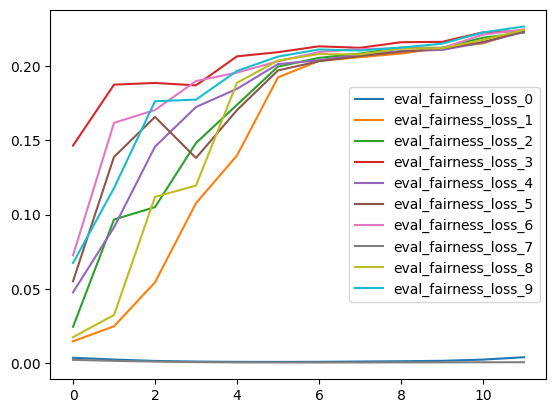

In [21]:
bayesian_loss.plot()

In [28]:
def results_metrics(marginal_results, bootstrap_results, bayesian_results, metric_name, runs):
    bayesian_loss = get_metrics_from_multi_columns(data=bayesian_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    bayesian_mean, bayesian_std = bayesian_loss.mean(axis=1), bayesian_loss.std(axis=1)
    all_results = {
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,
        f"bayesian_mean":bayesian_mean,
        f"bayesian_std":bayesian_std,
    }
    return pd.DataFrame(all_results)

In [37]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    ax1.plot(range(eval_loss.shape[0]), eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(eval_loss.shape[0]), eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(eval_loss.shape[0]), eval_loss["bayesian_mean"],"--", label = "bayesian")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["bayesian_mean"]-eval_loss["bayesian_std"]).values,
                     y2 = (eval_loss["bayesian_mean"]+eval_loss["bayesian_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Balance B")
    ax1.set(xlabel='t', ylabel='B')
    ax1.legend()

    # plot utility
    ax2.plot(range(eval_utility.shape[0]), eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(eval_utility.shape[0]), eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(eval_utility.shape[0]), eval_utility["bayesian_mean"],"--", label = "bayesian")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["bayesian_mean"]-eval_utility["bayesian_std"]).values,
                     y2 = (eval_utility["bayesian_mean"]+eval_utility["bayesian_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.set(xlabel='t', ylabel='U')
    ax2.legend()

    # fairness
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["bayesian_mean"],"--", label = "bayesian")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["bayesian_mean"]-eval_fainress["bayesian_std"]).values,
                     y2 = (eval_fainress["bayesian_mean"]+eval_fainress["bayesian_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.set(xlabel='t', ylabel='F')
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [38]:

def subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    x = range(eval_loss.shape[0])
    # plot total
    ax1.plot(x, eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(x, eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.plot(x, eval_loss["bayesian_mean"],"--", label = "bayesian")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["bayesian_mean"]-eval_loss["bayesian_std"]).values,
                     y2 = (eval_loss["bayesian_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Balance B")
    ax1.legend()

    # plot utility
    ax2.plot(x, eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(x, eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.plot(x, eval_utility["bayesian_mean"],"--", label = "bayesian")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["bayesian_mean"]-eval_utility["bayesian_std"]).values,
                     y2 = (eval_utility["bayesian_mean"]+eval_utility["bayesian_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(x, eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(x, eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.plot(x, eval_fainress["bayesian_mean"],"--", label = "bayesian")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["bayesian_mean"]-eval_fainress["bayesian_std"]).values,
                     y2 = (eval_fainress["bayesian_mean"]+eval_fainress["bayesian_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [39]:
bootstrap_results.columns

MultiIndex([('run_0',      'fairness_loss'),
            ('run_0',            'utility'),
            ('run_0',               'loss'),
            ('run_0', 'eval_fairness_loss'),
            ('run_0',       'eval_utility'),
            ('run_0',          'eval_loss'),
            ('run_1',      'fairness_loss'),
            ('run_1',            'utility'),
            ('run_1',               'loss'),
            ('run_1', 'eval_fairness_loss'),
            ('run_1',       'eval_utility'),
            ('run_1',          'eval_loss'),
            ('run_2',      'fairness_loss'),
            ('run_2',            'utility'),
            ('run_2',               'loss'),
            ('run_2', 'eval_fairness_loss'),
            ('run_2',       'eval_utility'),
            ('run_2',          'eval_loss'),
            ('run_3',      'fairness_loss'),
            ('run_3',            'utility'),
            ('run_3',               'loss'),
            ('run_3', 'eval_fairness_loss'),
          

In [40]:
ls = [ 0.0, 0.1, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.00, 1.10]#,0.8 ,0.9,1.0]
ls = [ 0.0,  0.1, 0.2, 0.3 , 0.4, 1.0, 10.0]#,0.8 ,0.9,1.0]

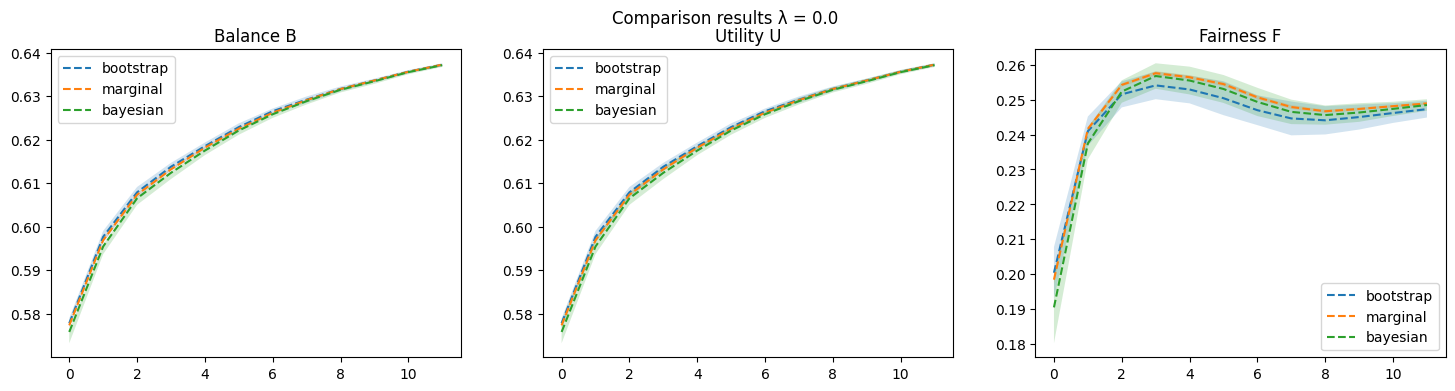

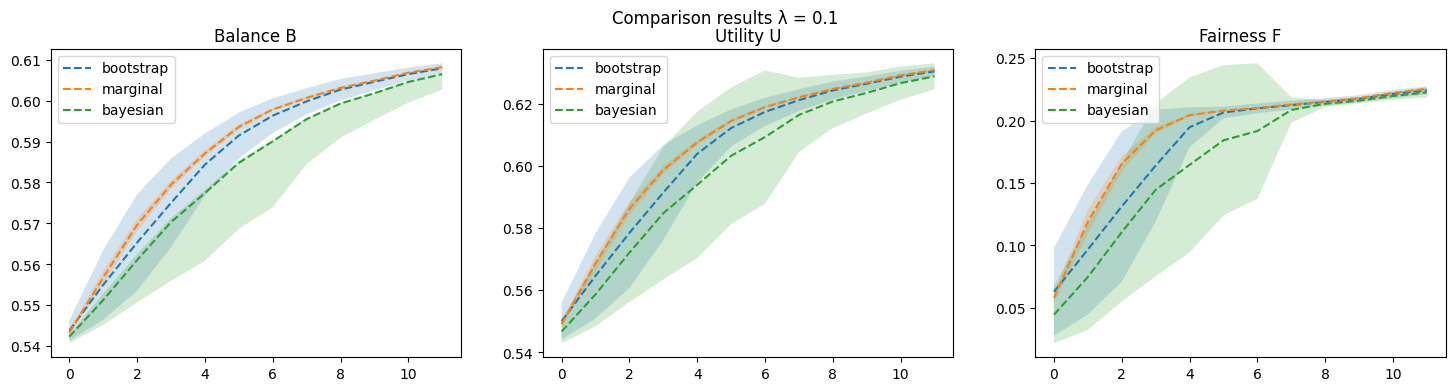

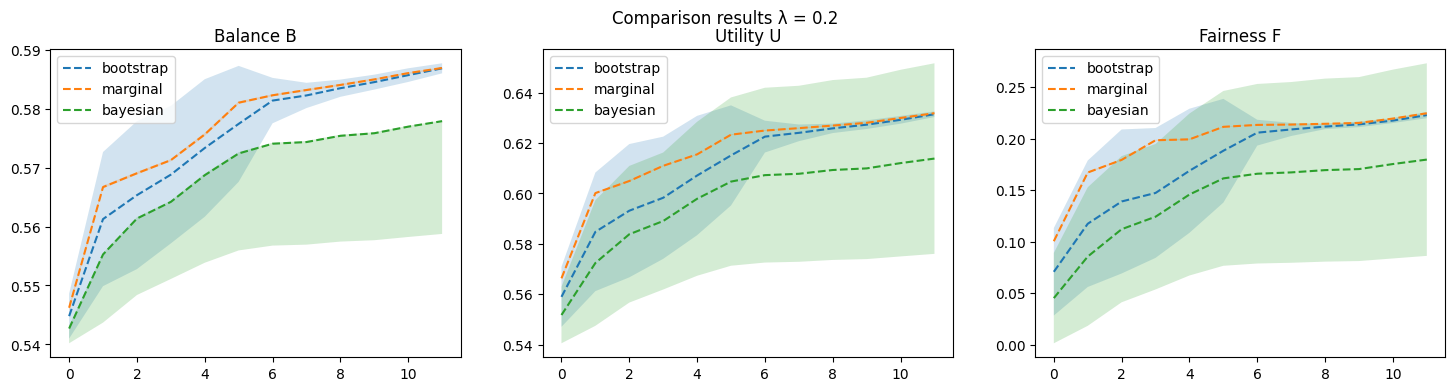

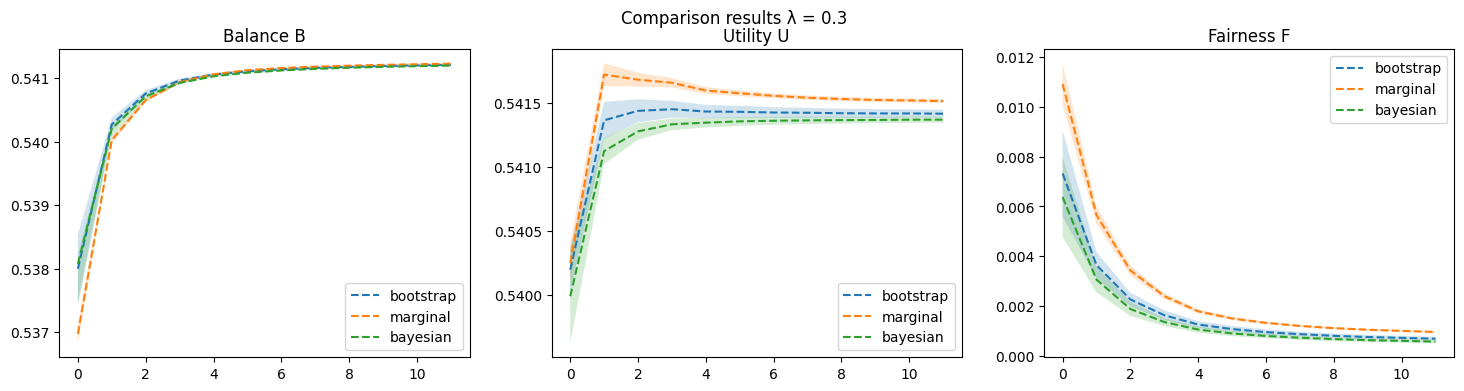

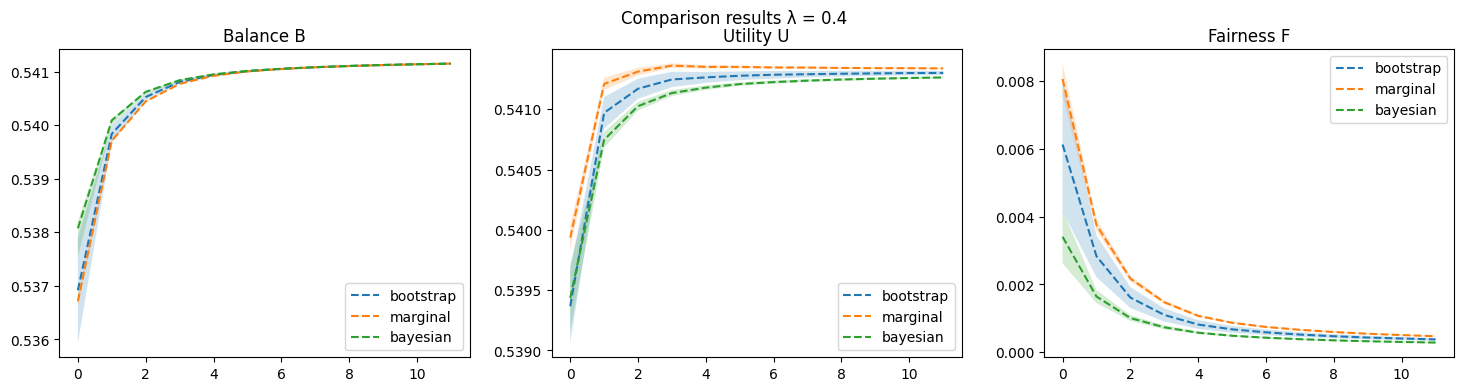

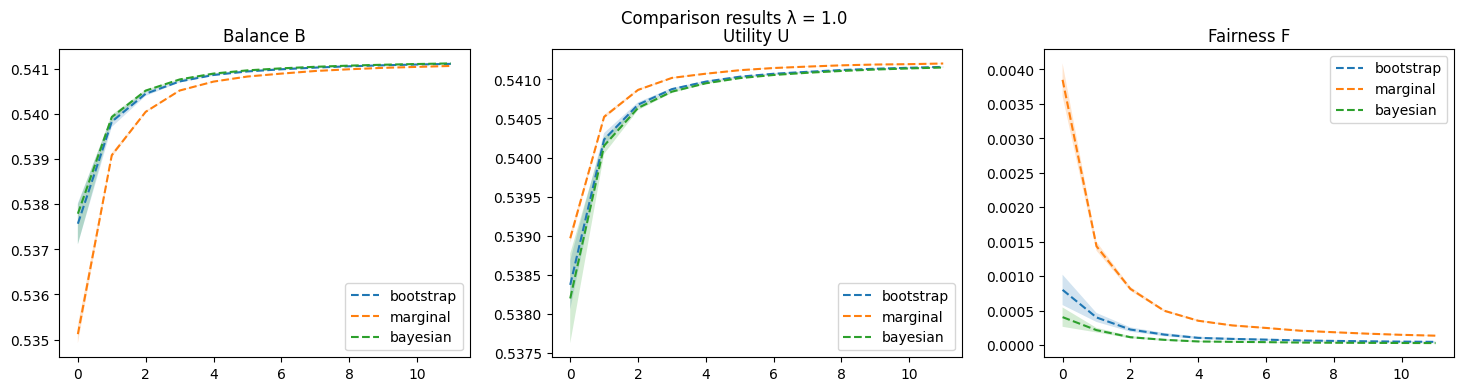

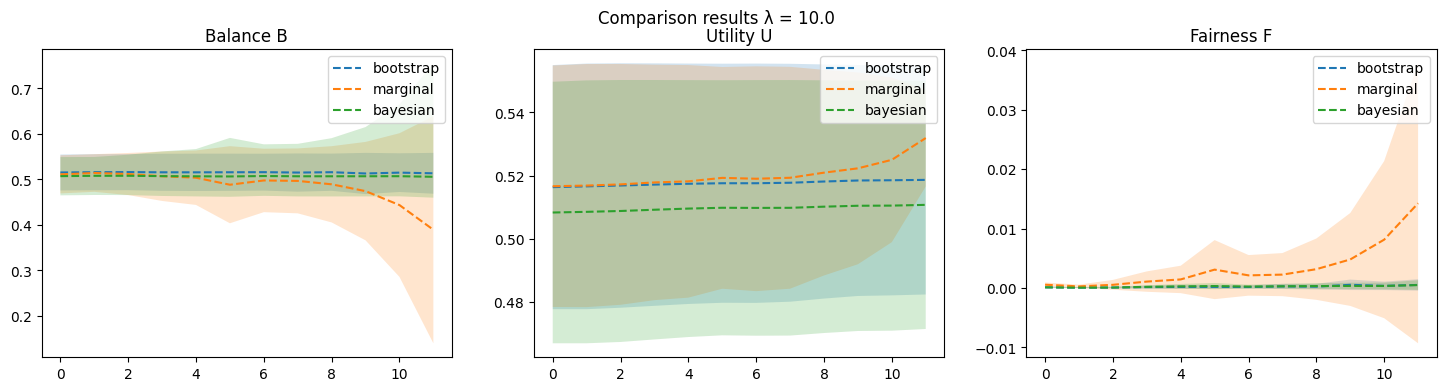

In [41]:
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    bayesian_results = pd.read_csv(results_path + f"/l_{l}/bayes_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                bayesian_results=bayesian_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    bayesian_results=bayesian_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    bayesian_results=bayesian_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

In [29]:
runs = range(10)
l_results = []
ls = [0.0, 0.5, 1.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    bayesian_results = pd.read_csv(results_path + f"/l_{l}/bayes_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                bayesian_results=bayesian_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    bayesian_results=bayesian_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    bayesian_results=bayesian_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    
    l_results += [[eval_loss, eval_utility, eval_fainress]]

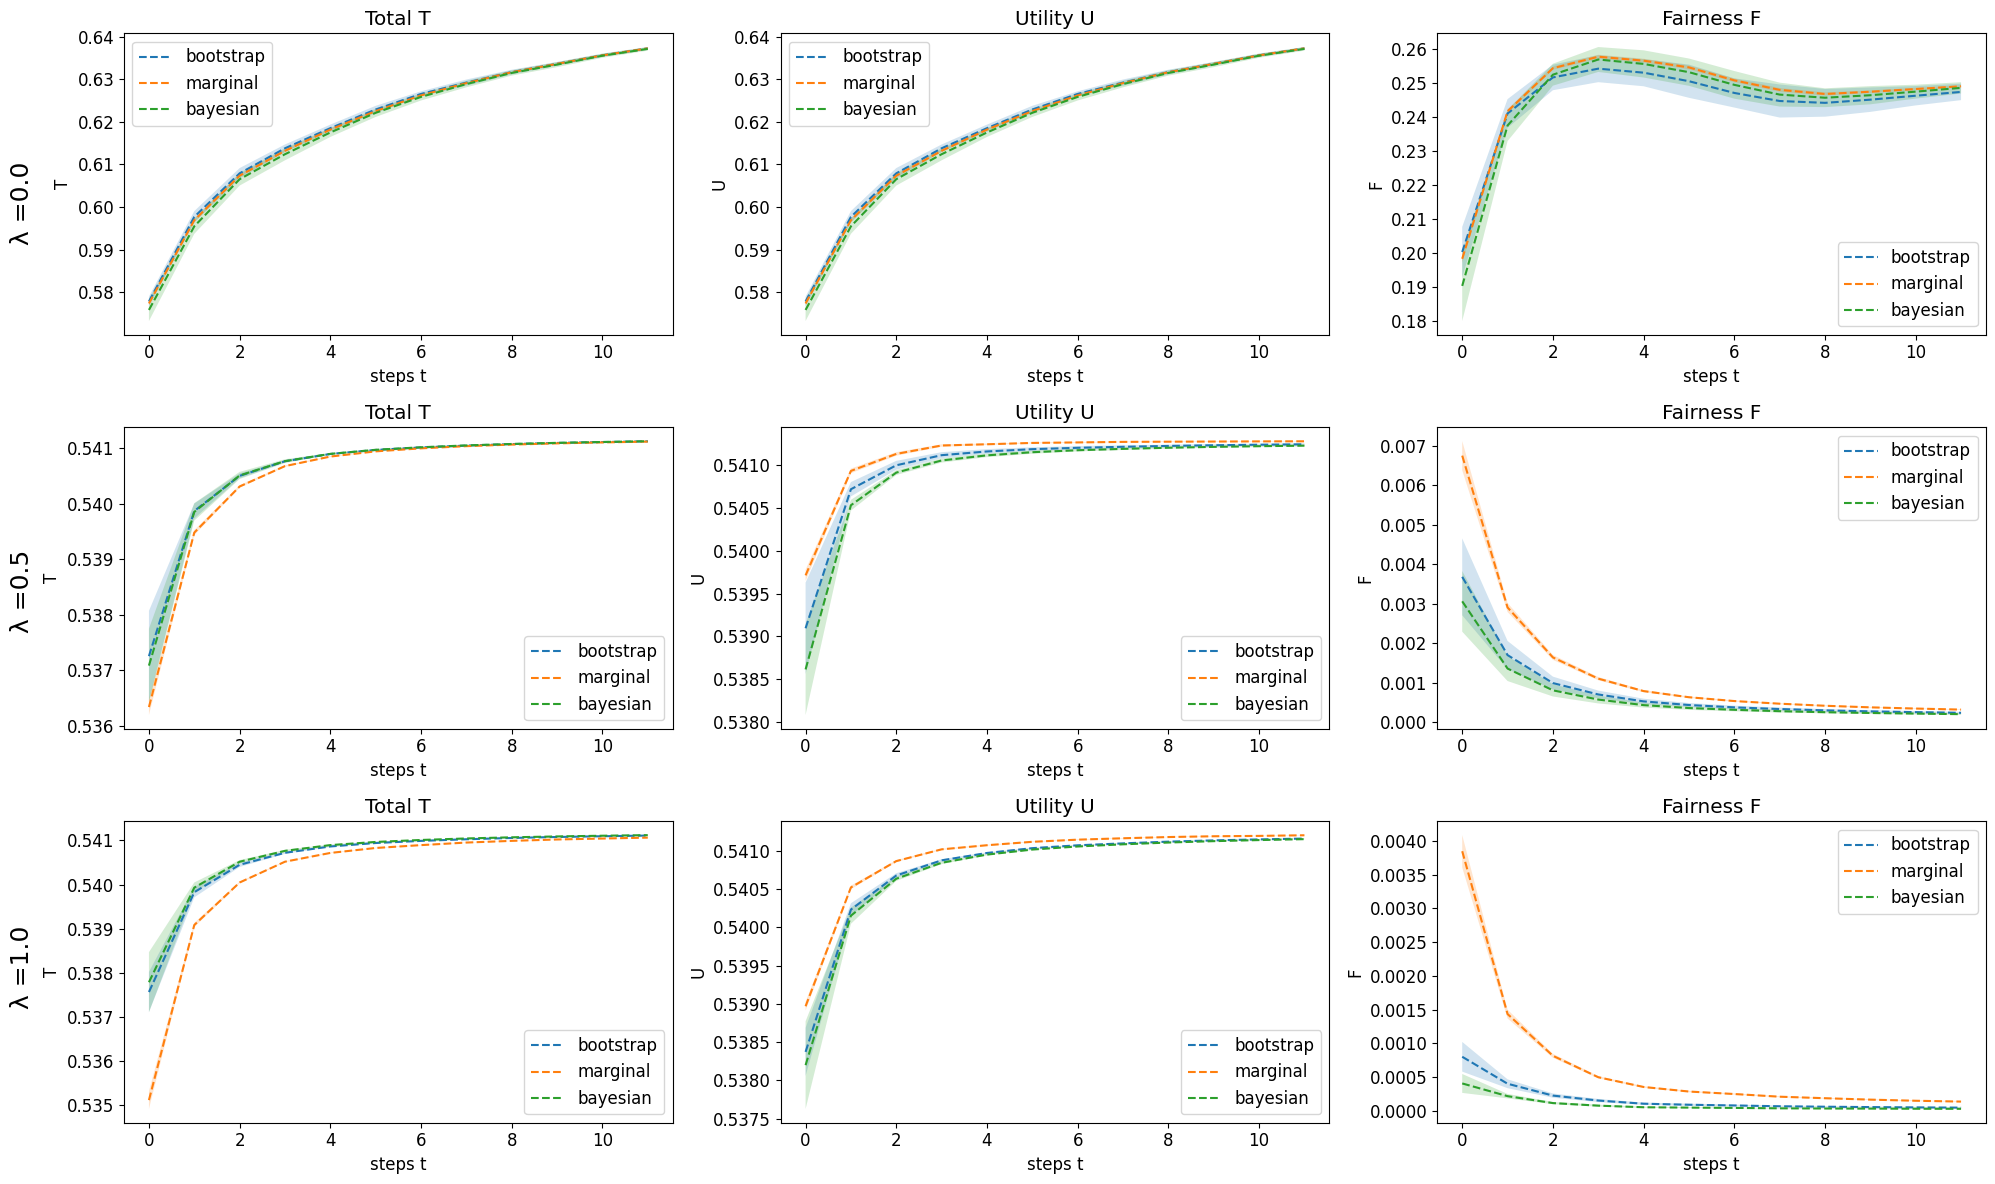

In [30]:
subplots_comparison_paper(ls=ls, losses_list=l_results, save_path=results_path)

In [25]:
plt.rcParams.update({'font.size': 12})

In [24]:
def subplots_comparison_paper(ls, losses_list, save_path):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    
    fig.text(0.003, 1/6 - 0.01, f'λ ={ls[2]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 1/3 + 1/6 - 0.03, f'λ ={ls[1]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 2/3 + 1/6 - 0.04, f'λ ={ls[0]}', rotation='vertical', fontsize = 18)
    
    for l, ax, losses in zip(ls, axes, losses_list):
        # plot total
        x = range(losses[0].shape[0])
        ax[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                         y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                         y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["bayesian_mean"],"--", label = "bayesian")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bayesian_mean"]-losses[0]["bayesian_std"]).values,
                         y2 = (losses[0]["bayesian_mean"]+losses[0]["bayesian_std"]).values,
                         alpha = 0.2)
        ax[0].set_title("Total T")
        ax[0].set(xlabel='steps t', ylabel=f'T')
        ax[0].legend()

        # plot utility
        ax[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                         y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                         y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["bayesian_mean"],"--", label = "bayesian")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bayesian_mean"]-losses[1]["bayesian_std"]).values,
                         y2 = (losses[1]["bayesian_mean"]+losses[1]["bayesian_std"]).values,
                         alpha = 0.2)
        ax[1].set_title("Utility U")
        ax[1].set(xlabel='steps t', ylabel='U')
        ax[1].legend()

        # fairness
        ax[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                         y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                         y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["bayesian_mean"],"--", label = "bayesian")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["bayesian_mean"]-losses[2]["bayesian_std"]).values,
                         y2 = (losses[2]["bayesian_mean"]+losses[2]["bayesian_std"]).values,
                         alpha = 0.2)
        ax[2].set_title("Fairness F")
        ax[2].set(xlabel='steps t', ylabel='F')
        ax[2].legend()
#         ax.suptitle(f"Comparison results λ = {l}")
    plt.tight_layout()
    fig.subplots_adjust(left=0.06)
    fig.savefig(save_path + f"/plots/comparison_subplots_paper.png")
    plt.show()
    plt.close()